In [8]:
import pandas as pd
import seaborn as sns

In [9]:
#load data on 2d dice

methods=['bet','funcmasker','rutherford']

dfs=dict()

for method in methods:
    dfs[method] = pd.read_csv(f'results/func/desc-{method}_dice-2d_metrics.csv')
    


In [10]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Segmentation performance by slice location')

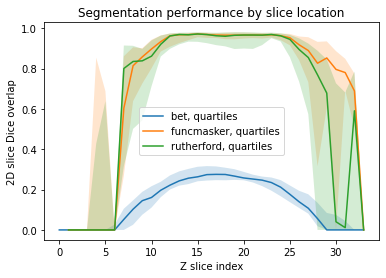

In [11]:
#plot median (with 0.25 to 0.75 quantiles shaded)

num_slices=34

x=np.arange(num_slices)
y=np.zeros(x.shape)
lower=np.zeros(x.shape)
upper=np.zeros(x.shape)

legend_handles=[]
legend_labels=[]

fig, ax = plt.subplots()
for method in methods:
    
    for i,z_slice in enumerate(range(num_slices)):
        y[i]= dfs[method][dfs[method].slice == z_slice].dice.quantile([0.5])
        lower[i]= dfs[method][dfs[method].slice == z_slice].dice.quantile([0.25])
        upper[i]= dfs[method][dfs[method].slice == z_slice].dice.quantile([0.75])
        
    line, = ax.plot(x,y)
    legend_handles.append(line)
    legend_labels.append(f'{method}, quartiles')
    ax.fill_between(x,lower,upper,alpha=0.2)
ax.legend(legend_handles,legend_labels)
plt.xlabel('Z slice index')
plt.ylabel('2D slice Dice overlap')
plt.title('Segmentation performance by slice location')



Text(0.5, 1.0, 'Segmentation performance by slice location')

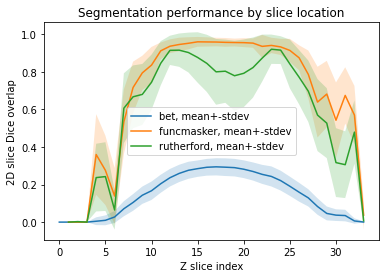

In [12]:
#plot mean +- stdev

num_slices=34

x=np.arange(num_slices)
y=np.zeros(x.shape)
lower=np.zeros(x.shape)
upper=np.zeros(x.shape)

legend_handles=[]
legend_labels=[]

fig, ax = plt.subplots()
for method in methods:
    
    for i,z_slice in enumerate(range(num_slices)):
        y[i]= dfs[method][dfs[method].slice == z_slice].dice.mean()
        stdev = dfs[method][dfs[method].slice == z_slice].dice.std()
        
        lower[i]= y[i] - stdev/2
        upper[i]= y[i] + stdev/2
        
    line, = ax.plot(x,y)
    legend_handles.append(line)
    legend_labels.append(f'{method}, mean+-stdev')
    ax.fill_between(x,lower,upper,alpha=0.2)
ax.legend(legend_handles,legend_labels)
plt.xlabel('Z slice index')
plt.ylabel('2D slice Dice overlap')
plt.title('Segmentation performance by slice location')

